In [1]:
import pandas as pd
import numpy as np

## Interactions

In [2]:
column_names = ["user", "item", "rating", "timestamp"]  
interactions = pd.read_csv('../data/raw/ml-100k/ml-100k/u.data', sep='\t', names=column_names)

In [3]:
interactions.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
interactions.isna().sum()

user         0
item         0
rating       0
timestamp    0
dtype: int64

<Axes: >

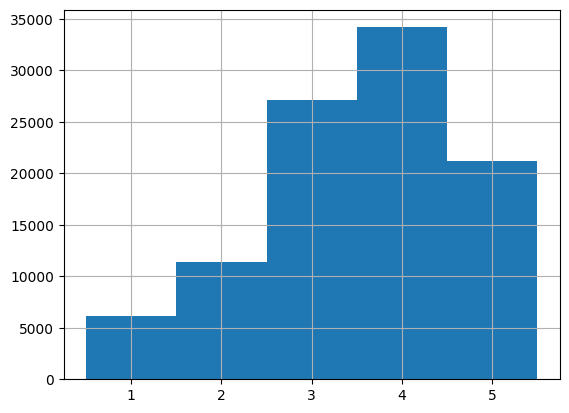

In [34]:
interactions.rating.hist(bins=np.linspace(0.5, 5.5, 6))

## Items

In [6]:
column_names = ["movieId", "movieTitle", "releaseDate", "URL"] + [f'genre{i}' for i in range(1, 20)]  
items = pd.read_csv('../data/raw/ml-100k/ml-100k/u.item', sep='|', names=column_names)

In [7]:
items[items.isna().any(axis=1)]

,movieId,movieTitle,releaseDate,URL,genre1,genre2,genre3,genre4,genre5,genre6,...,genre10,genre11,genre12,genre13,genre14,genre15,genre16,genre17,genre18,genre19
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1357,1358,The Deadly Cure (1996),16-Sep-1996,NaN,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1358,1359,Boys in Venice (1996),24-Sep-1996,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In the dataset we have one raw without any information about film, lets remove it.

In [8]:
items = items.query('movieId != 267')
interactions = interactions.query('item != 267')

## Genres

In [9]:
column_names = ["genreName", "genreId"]
genres = pd.read_csv('../data/raw/ml-100k/ml-100k/u.genre', sep='|', names=column_names)[['genreId', 'genreName']]

In [10]:
genres

,genreId,genreName
0,0,unknown
1,1,Action
2,2,Adventure
3,3,Animation
4,4,Children's
5,5,Comedy
6,6,Crime
7,7,Documentary
8,8,Drama
9,9,Fantasy


The first genre doesn't have a name, let's check how many films have such genre

In [11]:
items.query('genre1 == 1')

,movieId,movieTitle,releaseDate,URL,genre1,genre2,genre3,genre4,genre5,genre6,...,genre10,genre11,genre12,genre13,genre14,genre15,genre16,genre17,genre18,genre19
1372,1373,Good Morning (1971),4-Feb-1971,http://us.imdb.com/M/title-exact?Good%20Mornin...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [12]:
interactions.query('item == 1373')

,user,item,rating,timestamp
8567,181,1373,1,878962052


We have only one film with such genre and this film has only one poor rating, so I will remove this genre and this film

In [13]:
genres = genres.query('genreId != 0')
interactions = interactions.query('item != 1373')
items.index = np.arange(0, len(items))
items = items.query('movieId != 1373')
items = items.drop(columns=['genre1'])

## Users

In [14]:
column_names = ["userId", "age", "gender", "occupation", "zipcode"]
users = pd.read_csv('../data/raw/ml-100k/ml-100k/u.user', sep='|', names=column_names)

In [15]:
users.head()

,userId,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [16]:
users.age.describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

In [17]:
users.gender.value_counts()

gender
M    670
F    273
Name: count, dtype: int64

No outliers in the dataset

In [18]:
users.to_csv('../data/interim/u.user')
items.to_csv('../data/interim/u.item')
interactions.to_csv('../data/interim/u.data')
genres.to_csv('../data/interim/u.genre')